In [ ]:
#Import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb
import io
sb.set_style('darkgrid')
rcParams['figure.figsize'] = 8,8
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/My Drive/umoja/Train.csv')
test = pd.read_csv('/content/drive/My Drive/umoja/Test.csv')
submission = pd.read_csv('/content/drive/My Drive/umoja/SampleSubmission.csv')

In [ ]:
train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


# New Section

In [ ]:
train.tail()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
2154043,ffffe85215ddc71a84f95af0afb0deeea90e6967,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN,0
2154044,ffffeaaa9289cdba0ac000f0ab4b48f4aa74ed15,THIES,K > 24 month,6100.0,15.0,5800.0,1933.0,15.0,621.0,26.0,40.0,40.0,NaN,NaN,NO,55,"Data: 200 F=100MB,24H",9.0,0
2154045,fffff172fda1b4bb38a95385951908bb92379809,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,1
2154046,fffff5911296937a37f09a37a549da2e0dad6dbb,THIES,K > 24 month,10000.0,11.0,7120.0,2373.0,13.0,NaN,0.0,140.0,13.0,NaN,NaN,NO,28,All-net 500F=2000F;5d,12.0,0
2154047,fffff6dbff1508ea2bfe814e5ab2729ce6b788c2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NO,62,NaN,NaN,1


In [ ]:
train.shape

(2154048, 19)

In [ ]:
#view the data types in the train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           int64  
dtypes: float64(12), int64(2), object(5)
memory usage: 312.2+ MB


In [ ]:
test.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,THIES,K > 24 month,5000.0,5.0,5000.0,1667.0,5.0,NaN,378.0,11.0,5.0,NaN,NaN,NO,42,On-net 1000F=10MilF;10d,5.0
1,000055d41c8a62052dd426592e8a4a3342bf565d,NaN,I 18-21 month,300.0,2.0,326.0,109.0,3.0,397.0,NaN,0.0,NaN,NaN,NaN,NO,41,"Data: 100 F=40MB,24H",1.0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,DAKAR,K > 24 month,3300.0,25.0,3400.0,1133.0,26.0,7150.0,0.0,2.0,5.0,NaN,NaN,NO,57,"Data: 100 F=40MB,24H",22.0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,9,NaN,NaN
4,0000bae5480628cf8fe51ad84bcb39772fc79224,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,10,NaN,NaN


In [ ]:
test.tail()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
380122,fffe7e03c7eede2ad0a728ee516c4d342dd16107,DAKAR,K > 24 month,4000.0,8.0,3999.0,1333.0,8.0,1587.0,26.0,250.0,1.0,NaN,NaN,NO,53,Mixt 250F=Unlimited_call24H,5.0
380123,fffec230e6a1aa51ab37d0051ece42de611e71c6,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN
380124,ffff0dcc1ab9812bf205b6d76e9d084053cd96f5,NaN,K > 24 month,3950.0,7.0,3949.0,1316.0,10.0,1724.0,25.0,71.0,NaN,NaN,NaN,NO,15,IVR Echat_Daily_50F,6.0
380125,ffff91ea6a09a0c8ea42bc6ae33df4b5e06283dc,NaN,K > 24 month,3850.0,18.0,3955.0,1318.0,23.0,2962.0,0.0,7.0,NaN,NaN,NaN,NO,29,"Data: 100 F=40MB,24H",11.0
380126,ffffb393b346f5348034e6e22be93778d94d4beb,DIOURBEL,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NO,20,NaN,NaN


In [ ]:
test.shape

(380127, 18)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380127 entries, 0 to 380126
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         380127 non-null  object 
 1   REGION          230399 non-null  object 
 2   TENURE          380127 non-null  object 
 3   MONTANT         247072 non-null  float64
 4   FREQUENCE_RECH  247072 non-null  float64
 5   REVENUE         252754 non-null  float64
 6   ARPU_SEGMENT    252754 non-null  float64
 7   FREQUENCE       252754 non-null  float64
 8   DATA_VOLUME     193087 non-null  float64
 9   ON_NET          241613 non-null  float64
 10  ORANGE          222897 non-null  float64
 11  TIGO            153126 non-null  float64
 12  ZONE1           29861 non-null   float64
 13  ZONE2           24076 non-null   float64
 14  MRG             380127 non-null  object 
 15  REGULARITY      380127 non-null  int64  
 16  TOP_PACK        221348 non-null  object 
 17  FREQ_TOP_P

In [ ]:
submission.head()

,user_id,CHURN
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,0
1,000055d41c8a62052dd426592e8a4a3342bf565d,0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,0
4,0000bae5480628cf8fe51ad84bcb39772fc79224,0


In [ ]:
submission.shape

(380127, 2)

In [ ]:
train['TOP_PACK'].unique()
train['FREQUENCE'].unique()

array([17., nan,  2., 18.,  1., 22., 12.,  8., 36.,  7., 29., 57., 27.,
       16., 19., 15.,  6., 64., 30., 25.,  5., 45.,  9.,  3., 26., 68.,
       11., 13., 20., 42., 43., 73., 38., 10., 37., 44., 39., 14., 35.,
       21., 46.,  4., 28., 32., 24., 23., 47., 51., 48., 53., 31., 41.,
       54., 63., 50., 59., 40., 56., 58., 33., 80., 52., 65., 67., 71.,
       34., 55., 78., 49., 66., 69., 62., 83., 74., 82., 76., 61., 81.,
       77., 75., 72., 60., 85., 79., 86., 89., 70., 84., 88., 87., 91.,
       90.])

In [ ]:
#Check how many levels are involved in each of the categorical features (object)

DAKAR          513271
THIES          180052
SAINT-LOUIS    119886
LOUGA           99053
KAOLACK         96986
DIOURBEL        66911
TAMBACOUNDA     55074
KAFFRINE        43963
KOLDA           38743
FATICK          35643
MATAM           29083
ZIGUINCHOR      21945
SEDHIOU          3119
KEDOUGOU         1020
Name: REGION, dtype: int64


Text(0.5, 0, 'REGION')

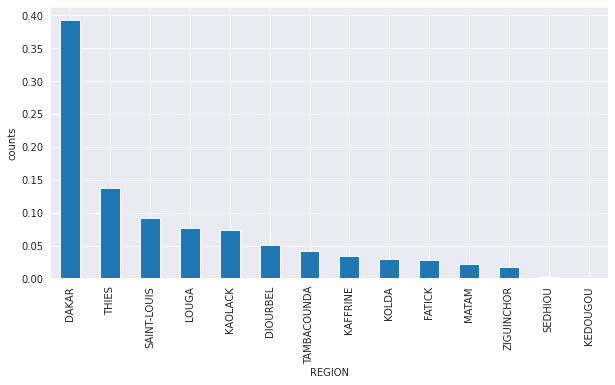

In [ ]:
print(train['REGION'].value_counts())
plt.figure(figsize=(10,5))
train['REGION'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('REGION')

K > 24 month     2043201
I 18-21 month      45278
H 15-18 month      26006
G 12-15 month      14901
J 21-24 month      12725
F 9-12 month        9328
E 6-9 month         1839
D 3-6 month          770
Name: TENURE, dtype: int64


Text(0.5, 0, 'TENURE')

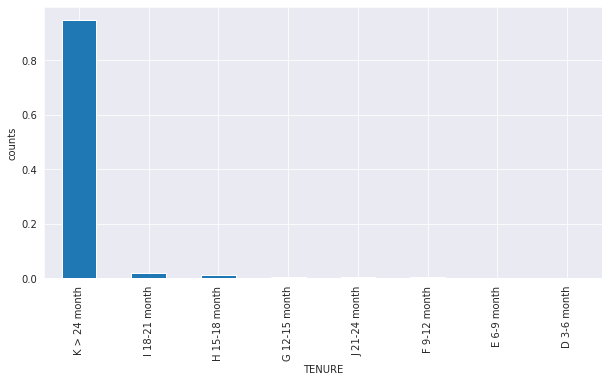

In [ ]:


print(train['TENURE'].value_counts())
plt.figure(figsize=(10,5))
train['TENURE'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('TENURE')

NO    2154048
Name: MRG, dtype: int64


Text(0.5, 0, 'MRG')

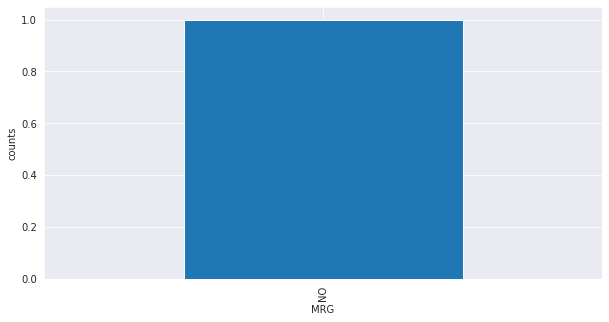

In [ ]:
print(train['MRG'].value_counts())
plt.figure(figsize=(10,5))
train['MRG'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('MRG')

All-net 500F=2000F;5d                   317802
On net 200F=Unlimited _call24H          152295
Data:490F=1GB,7d                        115180
Data: 100 F=40MB,24H                     84649
Mixt 250F=Unlimited_call24H              67512
                                         ...  
Go-NetPro-4 Go                               1
MegaChrono_3000F=12500F TOUS RESEAUX         1
pilot_offer4                                 1
APANews_monthly                              1
Data_Mifi_10Go                               1
Name: TOP_PACK, Length: 140, dtype: int64


Text(0.5, 0, 'TOP_PACK')

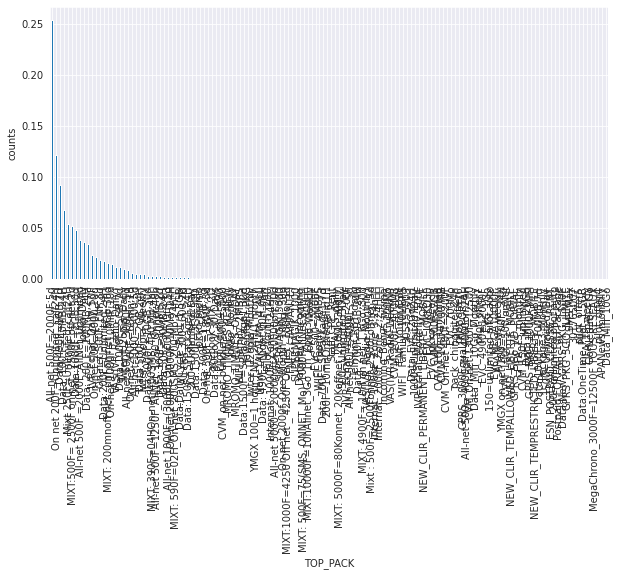

In [ ]:
#probaly not the best way to visualize this
print(train['TOP_PACK'].value_counts())
plt.figure(figsize=(10,5))
train['TOP_PACK'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('TOP_PACK')

0    1750062
1     403986
Name: CHURN, dtype: int64


Text(0.5, 0, 'Churn')

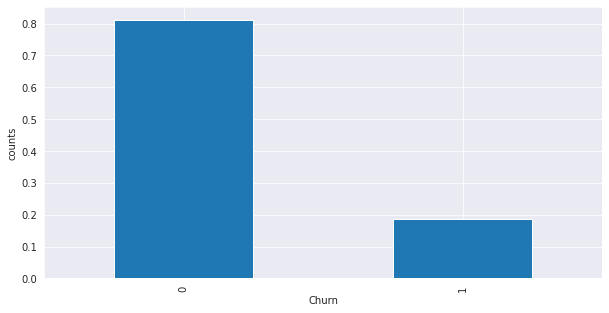

In [ ]:

#Check if the predictor class is balanced 
print(train['CHURN'].value_counts())
plt.figure(figsize=(10,5))
train['CHURN'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('Churn')

In [ ]:
#Check summary of numerical fields
train.select_dtypes(include=['int64', 'float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
MONTANT,1397309.0,5532.116998,7111.339421,10.0,1000.0,3000.0,7350.0,470000.0
FREQUENCE_RECH,1397309.0,11.529120,13.274070,1.0,2.0,7.0,16.0,133.0
REVENUE,1428000.0,5510.810334,7187.112880,1.0,1000.0,3000.0,7368.0,532177.0
ARPU_SEGMENT,1428000.0,1836.942894,2395.699954,0.0,333.0,1000.0,2456.0,177392.0
FREQUENCE,1428000.0,13.978141,14.694035,1.0,3.0,9.0,20.0,91.0
DATA_VOLUME,1093615.0,3366.450167,13304.463667,0.0,0.0,257.0,2895.0,1823866.0
ON_NET,1367373.0,277.689140,872.688909,0.0,5.0,27.0,156.0,50809.0
ORANGE,1258800.0,95.418711,204.987266,0.0,7.0,29.0,99.0,21323.0
TIGO,864032.0,23.109253,63.578086,0.0,2.0,6.0,20.0,4174.0
ZONE1,169721.0,8.170132,41.169511,0.0,0.0,1.0,3.0,4792.0


In [ ]:
#Check for missing values in training data
train.isnull().sum()

user_id                 0
REGION             849299
TENURE                  0
MONTANT            756739
FREQUENCE_RECH     756739
REVENUE            726048
ARPU_SEGMENT       726048
FREQUENCE          726048
DATA_VOLUME       1060433
ON_NET             786675
ORANGE             895248
TIGO              1290016
ZONE1             1984327
ZONE2             2017224
MRG                     0
REGULARITY              0
TOP_PACK           902594
FREQ_TOP_PACK      902594
CHURN                   0
dtype: int64

In [ ]:
#Check for missing values in test data
test.isnull().sum()

user_id                0
REGION            149728
TENURE                 0
MONTANT           133055
FREQUENCE_RECH    133055
REVENUE           127373
ARPU_SEGMENT      127373
FREQUENCE         127373
DATA_VOLUME       187040
ON_NET            138514
ORANGE            157230
TIGO              227001
ZONE1             350266
ZONE2             356051
MRG                    0
REGULARITY             0
TOP_PACK          158779
FREQ_TOP_PACK     158779
dtype: int64

In [ ]:
#We will drop REGION, TOP_PACK, and MRG
#We will also replace the missing values for the numerical columns with their means (averages)

In [ ]:
train.drop(columns=['REGION', 'MRG', 'TOP_PACK','FREQ_TOP_PACK'], inplace=True) #drop these columns

In [ ]:
train.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,54,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,17,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,62,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,11,0


In [ ]:
test.drop(columns=['REGION', 'MRG', 'TOP_PACK','FREQ_TOP_PACK'], inplace=True)

In [ ]:
test.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,K > 24 month,5000.0,5.0,5000.0,1667.0,5.0,NaN,378.0,11.0,5.0,NaN,NaN,42
1,000055d41c8a62052dd426592e8a4a3342bf565d,I 18-21 month,300.0,2.0,326.0,109.0,3.0,397.0,NaN,0.0,NaN,NaN,NaN,41
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,K > 24 month,3300.0,25.0,3400.0,1133.0,26.0,7150.0,0.0,2.0,5.0,NaN,NaN,57
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
4,0000bae5480628cf8fe51ad84bcb39772fc79224,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10


In [ ]:
#Fill NAs for train data

In [ ]:

train['MONTANT'].fillna((train['MONTANT'].mean()), inplace=True)
train['FREQUENCE_RECH'].fillna((train['FREQUENCE_RECH'].mean()), inplace=True)
train['REVENUE'].fillna((train['REVENUE'].mean()), inplace=True)
train['ARPU_SEGMENT'].fillna((train['ARPU_SEGMENT'].mean()), inplace=True)
train['FREQUENCE'].fillna((train['FREQUENCE'].mean()), inplace=True)
train['DATA_VOLUME'].fillna((train['DATA_VOLUME'].mean()), inplace=True)
train['ON_NET'].fillna((train['ON_NET'].mean()), inplace=True)
train['ORANGE'].fillna((train['ORANGE'].mean()), inplace=True)
train['TIGO'].fillna((train['TIGO'].mean()), inplace=True)
train['ZONE1'].fillna((train['ZONE1'].mean()), inplace=True)
train['ZONE2'].fillna((train['ZONE2'].mean()), inplace=True)

In [ ]:
#feature engineering
#CTON is the total calls to other networks
train['CTON'] = train['ORANGE'] + train['TIGO'] + train['ZONE1'] + train['ZONE2']
#TC is the total calls made by a user
train['TC'] = train['CTON'] + train['ON_NET']
columns = ['ORANGE','TIGO','ZONE1','ZONE2']
train.drop(columns = columns, inplace = True)
#AVG_REFILL_90_DAYS is the average refill a customer makes in 90 days
train['AVG_REFILL_90_DAYS'] = train['MONTANT'] / train['REGULARITY']

In [ ]:
train.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,REGULARITY,CHURN,CTON,TC,AVG_REFILL_90_DAYS
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,K > 24 month,4250.000000,15.00000,4251.000000,1417.000000,17.000000,4.000000,388.00000,54,0,50.000000,438.000000,78.703704
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,I 18-21 month,5532.116998,11.52912,5510.810334,1836.942894,13.978141,3366.450167,277.68914,4,1,134.251405,411.940546,1383.029249
2,00001654a9d9f96303d9969d0a4a851714a4bb57,K > 24 month,3600.000000,2.00000,1020.000000,340.000000,2.000000,3366.450167,90.00000,17,0,68.723442,158.723442,211.764706
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,K > 24 month,13500.000000,15.00000,13502.000000,4501.000000,18.000000,43804.000000,41.00000,62,0,119.723442,160.723442,217.741935
4,000028d9e13a595abe061f9b58f3d76ab907850f,K > 24 month,1000.000000,1.00000,985.000000,328.000000,1.000000,3366.450167,39.00000,11,0,62.832694,101.832694,90.909091


In [ ]:
train.isnull().sum()

user_id               0
TENURE                0
MONTANT               0
FREQUENCE_RECH        0
REVENUE               0
ARPU_SEGMENT          0
FREQUENCE             0
DATA_VOLUME           0
ON_NET                0
REGULARITY            0
CHURN                 0
CTON                  0
TC                    0
AVG_REFILL_90_DAYS    0
dtype: int64

In [ ]:
#Fill NAs for test data

In [ ]:
test['MONTANT'].fillna((test['MONTANT'].mean()), inplace=True)
test['FREQUENCE_RECH'].fillna((test['FREQUENCE_RECH'].mean()), inplace=True)
test['REVENUE'].fillna((test['REVENUE'].mean()), inplace=True)
test['ARPU_SEGMENT'].fillna((test['ARPU_SEGMENT'].mean()), inplace=True)
test['FREQUENCE'].fillna((test['FREQUENCE'].mean()), inplace=True)
test['DATA_VOLUME'].fillna((test['DATA_VOLUME'].mean()), inplace=True)
test['ON_NET'].fillna((test['ON_NET'].mean()), inplace=True)
test['ORANGE'].fillna((test['ORANGE'].mean()), inplace=True)
test['TIGO'].fillna((test['TIGO'].mean()), inplace=True)
test['ZONE1'].fillna((test['ZONE1'].mean()), inplace=True)
test['ZONE2'].fillna((test['ZONE2'].mean()), inplace=True)


In [ ]:
#feature engineering
test['CTON'] = test['ORANGE'] + test['TIGO'] + test['ZONE1'] + test['ZONE2']
test['TC'] = test['CTON'] + test['ON_NET']
columns = ['ORANGE','TIGO','ZONE1','ZONE2']
test.drop(columns = columns, inplace = True)
test['AVG_REFILL_90_DAYS'] = test['MONTANT'] / test['REGULARITY']

In [ ]:
test.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,REGULARITY,CTON,TC,AVG_REFILL_90_DAYS
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,K > 24 month,5000.000000,5.000000,5000.000000,1667.000000,5.000000,3346.095454,378.00000,42,31.819963,409.819963,119.047619
1,000055d41c8a62052dd426592e8a4a3342bf565d,I 18-21 month,300.000000,2.000000,326.000000,109.000000,3.000000,397.000000,278.80631,41,38.872051,317.678361,7.317073
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,K > 24 month,3300.000000,25.000000,3400.000000,1133.000000,26.000000,7150.000000,0.00000,57,22.819963,22.819963,57.894737
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,K > 24 month,5524.958826,11.519853,5499.680468,1833.232443,13.957963,3346.095454,278.80631,9,134.065059,412.871369,613.884314
4,0000bae5480628cf8fe51ad84bcb39772fc79224,K > 24 month,5524.958826,11.519853,5499.680468,1833.232443,13.957963,3346.095454,278.80631,10,134.065059,412.871369,552.495883


In [ ]:
test.isnull().sum()

user_id               0
TENURE                0
MONTANT               0
FREQUENCE_RECH        0
REVENUE               0
ARPU_SEGMENT          0
FREQUENCE             0
DATA_VOLUME           0
ON_NET                0
REGULARITY            0
CTON                  0
TC                    0
AVG_REFILL_90_DAYS    0
dtype: int64

## Machine Learning

In [ ]:

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_recall_curve, f1_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
dropcols = ['user_id', 'CHURN']
y = train['CHURN']
x = train.drop(columns=dropcols, axis=1)
test = test.drop(columns=['user_id'], axis=1) #you will use this for predicting and submitting the resulting
print(x.shape)
print(y.shape)
print(test.shape)

(2154048, 12)
(2154048,)
(380127, 12)


In [ ]:
#Split training data into train and test split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=1)
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(1507833, 12)
(1507833,)
(646215, 12)
(646215,)


In [ ]:
#Standardize numeric columns

In [ ]:

num_cols = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE',
       'DATA_VOLUME', 'ON_NET', 'AVG_REFILL_90_DAYS', 'CTON', 'TC', 'REGULARITY']

In [ ]:

scaler = StandardScaler()

In [ ]:
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [ ]:
X_train.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,REGULARITY,CTON,TC,AVG_REFILL_90_DAYS
1688519,K > 24 month,2.349350,4.813555,2.369140,2.368971,4.348186,-0.000587,7.923757,1.523261,0.244164,7.361817,-0.362017
1639889,K > 24 month,0.255895,3.223659,0.306102,0.306270,3.846678,0.071149,-0.385613,1.254087,-0.520580,-0.477810,-0.478402
444059,K > 24 month,-0.790832,-0.984888,-0.769947,-0.770122,-1.084819,-0.319179,-0.000144,-1.168483,-0.000481,-0.000246,-0.237874
1424683,K > 24 month,-0.000184,-0.000171,-0.000349,-0.000349,-0.000045,-0.244380,-0.000144,-1.078758,-0.000481,-0.000246,0.328507
1046167,K > 24 month,-0.000184,-0.000171,-0.000349,-0.000349,-0.000045,-0.000587,-0.000144,-0.719859,-0.000481,-0.000246,-0.262883


In [ ]:
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [ ]:

X_test.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,REGULARITY,CTON,TC,AVG_REFILL_90_DAYS
417912,K > 24 month,5.489531,0.885577,5.559411,5.559247,1.004798,-0.162195,1.499489,1.523261,6.884776,3.000217,-0.175803
1380278,K > 24 month,-0.354696,-0.423749,-0.343417,-0.343250,-0.583311,-0.000587,-0.355486,-0.226372,-0.121633,-0.356285,-0.460972
657158,K > 24 month,-0.000184,-0.000171,-0.000349,-0.000349,-0.000045,-0.000587,-0.000144,-0.181510,-0.000481,-0.000246,-0.410730
228934,I 18-21 month,-0.000184,-0.000171,-0.000349,-0.000349,-0.000045,-0.000587,-0.000144,-1.213345,-0.000481,-0.000246,2.989759
2020145,K > 24 month,2.192340,0.417961,2.147516,2.147345,0.252536,-0.000587,0.119376,1.119500,0.446759,0.215035,-0.339531


In [ ]:
test[num_cols] = scaler.transform(test[num_cols])

In [ ]:
test.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,REGULARITY,CTON,TC,AVG_REFILL_90_DAYS
0,K > 24 month,-0.093014,-0.610795,-0.087499,-0.087332,-0.750480,-0.002704,0.143765,0.626013,-0.576928,-0.003050,-0.482220
1,I 18-21 month,-0.912950,-0.891365,-0.884939,-0.884773,-0.917650,-0.309504,0.001459,0.581151,-0.537242,-0.124907,-0.553884
2,K > 24 month,-0.389587,1.259670,-0.360478,-0.360653,1.004798,0.393024,-0.398525,1.298949,-0.627577,-0.514857,-0.521443
3,K > 24 month,-0.001433,-0.001037,-0.002248,-0.002248,-0.001732,-0.002704,0.001459,-0.854446,-0.001530,0.000985,-0.164828
4,K > 24 month,-0.001433,-0.001037,-0.002248,-0.002248,-0.001732,-0.002704,0.001459,-0.809583,-0.001530,0.000985,-0.204203


In [ ]:
#Encode the TENURE column

In [ ]:
encoder = LabelEncoder()
X_train["TENURE"] = encoder.fit_transform(X_train["TENURE"])
X_train['TENURE'] = pd.get_dummies(X_train['TENURE'])

In [ ]:
X_test["TENURE"] = encoder.transform(X_test["TENURE"])
X_test['TENURE'] = pd.get_dummies(X_test['TENURE'])

In [ ]:
test['TENURE'] = encoder.fit_transform(test["TENURE"])
test['TENURE'] = pd.get_dummies(test['TENURE'])

In [ ]:

X_train.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,REGULARITY,CTON,TC,AVG_REFILL_90_DAYS
1688519,0,2.349350,4.813555,2.369140,2.368971,4.348186,-0.000587,7.923757,1.523261,0.244164,7.361817,-0.362017
1639889,0,0.255895,3.223659,0.306102,0.306270,3.846678,0.071149,-0.385613,1.254087,-0.520580,-0.477810,-0.478402
444059,0,-0.790832,-0.984888,-0.769947,-0.770122,-1.084819,-0.319179,-0.000144,-1.168483,-0.000481,-0.000246,-0.237874
1424683,0,-0.000184,-0.000171,-0.000349,-0.000349,-0.000045,-0.244380,-0.000144,-1.078758,-0.000481,-0.000246,0.328507
1046167,0,-0.000184,-0.000171,-0.000349,-0.000349,-0.000045,-0.000587,-0.000144,-0.719859,-0.000481,-0.000246,-0.262883


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rand = RandomForestClassifier()
model = rand.fit(X_train,y_train)
print("Training score: ",model.score(X_train,y_train))


Training score:  0.9013564499516856


In [ ]:
print("Test set score: ",model.score(X_test,y_test))

Test set score:  0.8600047971650302


In [ ]:
rand_preds = model.predict(X_test)
print('Accuracy')
print(accuracy_score(y_test, rand_preds))

Accuracy
0.8600047971650302


In [ ]:
print("Recall")
recall_score(y_test, rand_preds)

Recall


0.5632222893210791

In [ ]:
print("F1 Score")
f1_score(y_test, rand_preds)

F1 Score


0.6008251152734574

In [ ]:
print(confusion_matrix(y_test, rand_preds))

[[487664  37668]
 [ 52799  68084]]


In [ ]:
#creating xgboost pipeline

In [ ]:
xgb_cl = xgb.XGBClassifier(subsample=0.6, n_estimators=300, learning_rate=0.1)

In [ ]:
xgb_cl.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)

In [ ]:
preds=xgb_cl.predict(X_test)

In [ ]:
parameters = {'learning_rate': [0.001,0.01,0.01],
              'n_estimators':[300],
    'subsample': [0.3,0.4]
}
from sklearn.model_selection import RandomizedSearchCV
r_cv = RandomizedSearchCV(xgb_cl,param_distributions=parameters,
                       cv=3)
r_cv.fit(X_train,y_train)
print(r_cv.best_params_)
print(np.sqrt(np.abs(r_cv.best_score_)))

KeyboardInterrupt: ignored

In [ ]:
print("Acuracy")
accuracy_score(y_test,preds)

In [ ]:
print("Recall")
recall_score(y_test, preds)

Recall


0.5475707915918698

In [ ]:
print("F1 Score")
f1_score(y_test, preds)

In [ ]:
confusion_matrix()

In [ ]:
# Making a submissio

In [ ]:
submission.head()

In [ ]:
test.head()

In [ ]:
subpred = randmodel.predict(test)

In [ ]:
subpred

In [ ]:
submission["CHURN"] = subpred

In [ ]:
submission.head()

In [ ]:
submission.to_csv('starter_code_submission.csv', index=False)

In [ ]:
# 1. Do more feature engineering
# 2. Handle the imbalance nature of the predictor class 
# 3. Use other algorithms
# 4. Tune hyperparameters of this model
# 5. Handle missing values properly
# 6. Any other thing you feel can improve the performance of the model is good to go


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
'''
# Number of trees in random forest
n_estimators = [int(x) for x in range(100,300,30)]
# Number of features to consider at every split
max_feat
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf = RandomizedSearchCV(estimator=rand,param_distributions=random_grid,cv=5)'''

In [ ]:
rf.fit(X_train,y_train)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import 